신경망의 핵심은 유닛(노드, 뉴런)이다. 유닛은 하나 이상의 입력을 받아 가중치(파라미터)를 곱한다. 가중치가 곱해진 입력에 어떤 절편을 더하고 활성화 함수에 값을 전달한다. 출력은 신경망에서 더 깊은 층에 잇는 다른 뉴런을 위해 앞으로 전달.
- 신경망: 일련의 연결된 층으로 표현할 수 있으며 한쪽 끝에는 샘플의 특성값과 다른 한쪽에는 타깃값(예를 들면 샘플의 클래스)를 연결한 네트워크.
- 피드포워드: 샘플의 특성값이 네트워크 앞쪽으로 주입된다는 사실을 의미. 각 층은 연속적으로 특성값을 변환하여 타깃값과 같은 최종 출력을 내는 것이 목적.

피드 포워드 신경망은 세 가지 종류의 층으로 구성. 시작 부분은 입력층으로 각 유닛은 샘플의 개별 특성값. 끝은 출력층으로 은닉층의 출력의 문제를 해결할 수 있도록 변환. 입력층과 출력층 사이는 은닉층으로 입력층에서 받은 특성값을 출력층에서 처리될 때 타깃 클래스와 닮도록 연속적으로 변환. __은닉층을 많이 가진 신경망을 심층 신경망이라고 부르며 이런 애플리케이션을 딥러닝이라고 한다.__ 신경망을 만들 때 일반적으로 가우시안 분포나 균등 분포를 따르는 작은 난숫값으로 모델 파라미터 초기화.
- 정방향 계산: 샘플 하나가 신경망에 주입되면 손실 함수를 사용해 출력 값과 샘플의 진짜 타깃값을 비교하는 것.
- 역전파: 알고리즘 예측과 정답 간의 오차에 각 모델 파라미터가 얼마나 기여했는지 파악하기 위해 네트워크의 역방향으로 진행.

신경망은 훈련 데이터에 있는 모든 샘플에 대해 정방향 계산과 역전파를 여러 번 반복하면서 학습.(에폭: 모든 샘플이 네트워크를 통과하는 것)
모델 파라미터의 값도 반복적으로 업데이트된다. 
![image](https://user-images.githubusercontent.com/61931924/97422903-cc908200-1951-11eb-9b79-9be12074cc74.png)



- 케라스: 텐서플로나 씨아노를 엔진으로 사용하는 라이브러리. 텐서 연산 같은 상세 사항은 다른 라이브러리에 위임하고 네트워크 디자인과 훈련에 집중.

### 신경망을 위한 데이터 전처리
신경망에 사용할 데이터를 전처리 하고 싶다. → 사이킷런의 StandardScaler
- 일반적으로 신경망의 모델 파라미터는 작은 난수로 초기화.
- 특성값이 모델 파라미터보다 크면 종종 신경망의 성능이 나빠진다.
- 샘플의 특성값이 개별 유닛을 통과하면서 합쳐지기 때문에 모든 특성이 같은 스케일을 가지는 것이 중요.

In [3]:
from sklearn import preprocessing
import numpy as np

# feature 생성
features = np.array([[-100.1, 3240.1],
                    [-200.2, -234.1],
                    [5000.5, 150.1],
                    [6000.6, -125.1],
                    [9000.9, -673.1]])
# 객체 생성
scaler = preprocessing.StandardScaler()

# 변환
features_stand = scaler.fit_transform(features)

# 확인
features_stand

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

### 신경망 구성하기
신경망 만들고 싶다. → 케라스의 Sequential 모델 사용.  
은닉층의 유닛에 대해 기억해야 할 것.
1. 여러 개의 값을 입력받는다.
2. 각 입력을 모델 파라미터와 곱한다.
3. 모든 입력에 가중치를 곱하고 절편(일반적으로 0)을 더한다.
4. 대부분 어떤 함수(활성화 함수)를 적용한다.
5. 다음 층에 있는 유닛으로 출력을 보낸다.
- 각 은닉층과 출력층에 대해 층에 사용할 유닛 개수와 활성화 함수를 정의해야 한다. 층에 유닛을 많이 추가할수록 네트워크는 더 복잡한 패턴을 학습할 수 있으나 과대적합이 될 수 있다. 은닉층의 활성화 함수는 주로 렐루이다.  

  &nbsp;&nbsp;&nbsp;  $f(z)=max(0,z)$, &nbsp; $z$ = 가중치가 적용된 입력과 절편의 합.  


- 네트워크에 사용할 여러 은닉층을 정의. 층이 많으면 복잡한 관계 학습 가능. 그러나 계산 비용 증가.
- 출력층의 활성화 함수 정의. 출력 형태는 네트워크의 목적에 따라 결정. 종류: 이진분류(시그모이드 함수와 하나의 유닛), 다중 분류(소프트맥스 활성화 함수와 k(타깃 클래스 개수)개의 유닛), 회귀(활성화 함수x, 하나의 유닛)
- 손실 함수또한 정의해야 한다. 문제의 유형에 따라 결정. 종류: 이진 분류(이진 크로스엔트로피), 다중 분류(범주형 크로스엔트로피), 회귀(평균 제곱 오차)
- 옵티마이저를 정의해야 한다. 가장 작은 손실 함수 오차를 만드는 파라미터 값을 찾는 전략. 주로 확률적 경사 하강법, 모멘텀을 사용한 확률적 경사 하강법, RMSProp, Adam.
- 하나 이상의 성능 지표를 선택해야 한다.

In [2]:
from keras import models
from keras import layers

# 신경망 모델 제작.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층을 추가.
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 렐루 활성화 함수를 사용한 완전 연결층을 추가.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층을 추가.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
               optimizer="rmsprop",         # 옵티마이저
               metrics=["accuracy"])        # 성능 지표

### 이진 분류기 훈련하기
이진 분류 신경망을 훈련하고 싶다. → 만든 신경망에 fit method로 훈련하면 된다.
- '긍정'과 '부정' 두 가지 답안으로 나뉘어 있는 50,000개의 영화 리뷰데이터를 사용했다. 가장 자주 등장하는 단어 1000개를 사용해 리뷰 텍스트를 단어의 등장 여부를 나타내는 1000개의 이진 특성으로 변환. 1000개의 특성으로 이뤄진 25000개의 샘플을 사용해 영화 리뷰가 긍정인지 부정인지 예측한다.
- 데이터의 개수가 25000개의 feature 수는 1000개 임을 알 수 있다.
- epochs 매개변수는 훈련할 때 사용할 에폭 횟수를 정의, verbose 매개변수는 훈련 과정 동안 얼마나 많은 정보를 출력할지 결정. 1은 진행 막대, 2는 한 줄씩 로그를 입력. batch_size는 모델 파라미터를 업데이트 하기 전에 통과시킬 샘플의 수를 결정.
- 모델 평가를 위해 validation_data 매개변수에 테스트 세트를 사용할 수 있다. 또는 validation_split 매개변수를 통해 훈련 데이터에서 평가에 사용할 비율을 정할 수 있다.
- 에폭마다 손실값(loss)과 성능 수치가 담긴 History 객체를 반환.

In [14]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)   # feature의 숫자를 정해줌.

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
print(features_train)
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
Epoch 1/3
250/250 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8125 - val_loss: 0.3346 - val_accuracy: 0.8599
Epoch 2/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8658 - val_loss: 0.3249 - val_accuracy: 0.8620
Epoch 3/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8683 - val_loss: 0.3251 - val_accuracy: 0.8615


In [10]:
# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop") # 옵티마이저

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

Epoch 1/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3111 - val_loss: 0.3273
Epoch 2/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3245
Epoch 3/3
250/250 [==============================] - 0s 957us/step - loss: 0.2956 - val_loss: 0.3256


#### 주의사항
- compile method에 metrics를 지정하지 않으면 위의 loss만 계산하고 History도 loss만 출력한다. 
- IMDB 데이터는 정수의 리스트로 변환한 데이터. 
- Tokenizer 클래스의 num_words 매개변수를 지정하고 sequences_to_matrix 메서드를 호출하면 num_words 값보다 큰 정수는 모두 제외시키고 mode 매개변수에 지정한 방식에 맞춰 행렬을 만든다.
- mode 매개변수가 binary이면 시퀀스에 등장한 정수에 해당하는 위치에 1을 저장. count이면 시퀀스에 등장하는 횟수를 저장. freq이면 등장 횟수를 시퀀스의 길이로 나눈다.

### 이진 분류기 예측하기.
신경망을 사용해 예측을 만들고 싶다. → predict method를 사용하면 된다.
- 이진분류기이므로 예측 결과는 클래스 1이 될 확률.

In [15]:
# 테스트 세트의 클래스 예측하기.
predicted_target = network.predict(features_test)
print(predicted_target)

[[0.32005113]
 [0.99883926]
 [0.48088077]
 ...
 [0.09883678]
 [0.07737711]
 [0.37777996]]


### 훈련 기록 시각화하기.
가장 좋은 신경망의 손실이나 정확도 점수를 찾고 싶습니다. → matplotlib 라이브러리를 사용해 에폭마다 훈련 세트와 테스트 세트의 손실을 시각화.

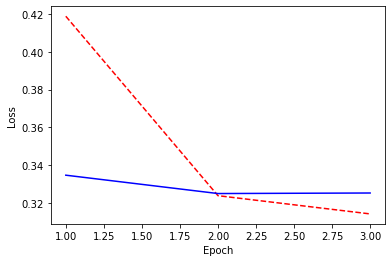

In [16]:
import matplotlib.pyplot as plt

# 훈련 손실과 테스트 손실의 기록을 저장.
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# 에폭 횟수를 사용해 카운트 객체를 만든다.
epoch_count = range(1, len(train_loss)+1)

# 손실값 시각화.
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#### 성능을 높여 출력해보겠다.

In [23]:
# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      verbose=0, # 에포크 과정을 출력합니다.
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 테스트 세트의 클래스 예측하기.
predicted_target = network.predict(features_test)
print(predicted_target)

[[0.16198853]
 [0.99242175]
 [0.9940749 ]
 ...
 [0.11046278]
 [0.00191867]
 [0.19750899]]


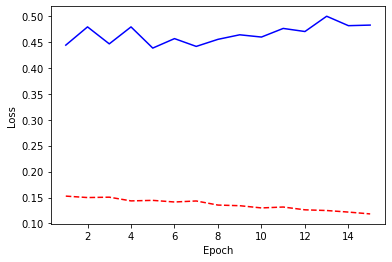

In [24]:
import matplotlib.pyplot as plt

# 훈련 손실과 테스트 손실의 기록을 저장.
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# 에폭 횟수를 사용해 카운트 객체를 만든다.
epoch_count = range(1, len(train_loss)+1)

# 손실값 시각화.
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

실행할 때마다 값이 새롭게 바뀐다.